In [19]:
import streamlit as st
from PIL import Image 
import pandas as pd
from bibliotheque.lib import *
from bibliotheque.base_donnees import *
from plotly import graph_objects as go
from plotly.offline import iplot
import numpy as np
import matplotlib.pyplot as plt

In [50]:
rep_genre = lire_reponse(question_6())
mon_index=[]
mes_valeurs=[]
for i in range (len(rep_genre)):
    mon_index.append(rep_genre[i][0])
    mes_valeurs.append(rep_genre[i][1])
graph = go.Bar(x= mon_index,
               y = mes_valeurs)
representation = go.Figure(data = graph)
iplot(representation)


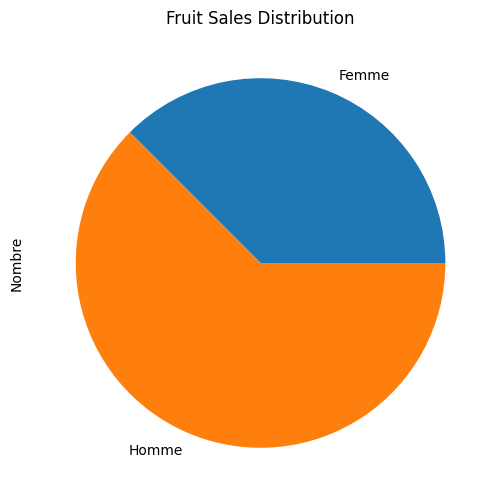

In [55]:
rep_genre = lire_reponse(question_6())
mon_index=[]
mes_valeurs=[]
mon_dico = {}
for i in range (len(rep_genre)):
    mon_index.append(rep_genre[i][0])
    mes_valeurs.append(rep_genre[i][1])
    mon_dico[rep_genre[i][0]] = rep_genre[i][1]

type(mon_dico)
mon_dico

df = pd.DataFrame(mon_dico, index=["Nombre"]).T

# plt.figure(figsize=(10,6))
df['Nombre'].plot(kind='pie', title= 'Fruit Sales Distribution' , figsize=(10,6))
# plt.title('Fruit Sales Distribution')
plt.show()




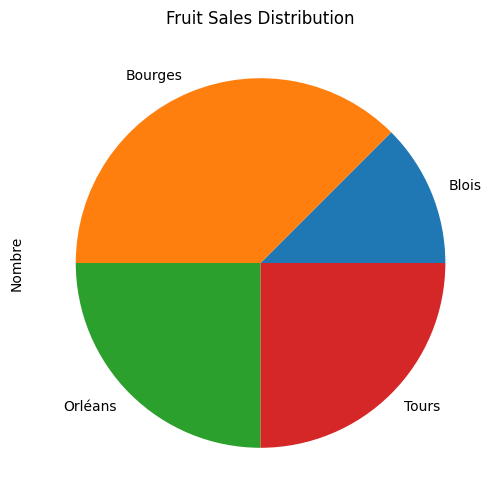

In [3]:
rep_ville = lire_reponse(question_2())
mon_index=[]
mes_valeurs=[]
mon_dico = {}
for i in range (len(rep_ville)):
    mon_index.append(rep_ville[i][0])
    mes_valeurs.append(rep_ville[i][1])
    mon_dico[rep_ville[i][0]] = rep_ville[i][1]

type(mon_dico)
mon_dico

df = pd.DataFrame(mon_dico, index=["Nombre"]).T

# plt.figure(figsize=(10,6))
df['Nombre'].plot(kind='pie', title= 'Fruit Sales Distribution' , figsize=(10,6))
# plt.title('Fruit Sales Distribution')
plt.show()


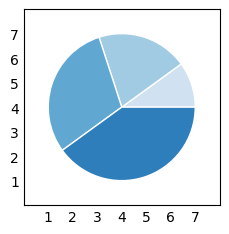

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

<Axes: ylabel='Frequency'>

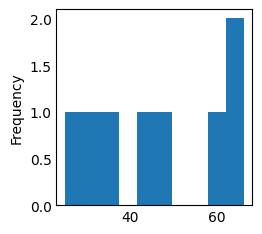

In [21]:
rep_ville = lire_reponse(question_3b())
rep_ville


mes_valeurs=[]

for i in range (len(rep_ville)):
    
    mes_valeurs.append(rep_ville[i][0])
    
mes_valeurs
ma_serie = pd.Series(data=mes_valeurs)
ma_serie.plot(kind="hist")

In [22]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 8))
colors

array([[0.81411765, 0.88392157, 0.94980392, 1.        ],
       [0.75063437, 0.84784314, 0.92821223, 1.        ],
       [0.66205306, 0.81019608, 0.89720877, 1.        ],
       [0.5545098 , 0.75641676, 0.86831219, 1.        ],
       [0.44156863, 0.69440984, 0.84395233, 1.        ],
       [0.34646674, 0.63240292, 0.81067282, 1.        ],
       [0.25628604, 0.57001153, 0.7751634 , 1.        ],
       [0.17914648, 0.49287197, 0.73542484, 1.        ]])

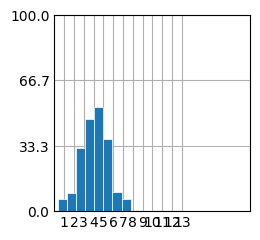

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 20), xticks=np.arange(1, 14),
       ylim=(0, 56), yticks=np.linspace(0, 100, 4))

plt.show()

In [29]:
def connecter():
    """
    :name : connecter
    :param : 
    :return : curseur et connexion nécessaires à d'autres fonctions
    :desc : se connecter à la base et activer le curseur
    """

    try:
        connexion = sqlite3.connect("Gestion_personnel.db")
        curseur = connexion.cursor()
        return curseur, connexion

    except sqlite3.Error as e:
        print(e, "\n\n=====> La connexion ne s'est pas établie")

In [36]:
def question_8():
    
    """
    :name : question_8
    :param : 
    :return : le résultat de la requête
    :desc : afficher la liste de tous les employés de la société
    """
    
    try:
    
        curseur, connexion = connecter()

        curseur.execute("""
                        SELECT id_em, nom, prenom, date_naissance, date_entree, date_sortie, genre, site
                        FROM employes 
                            LEFT JOIN genres ON employes.id_ge = genres.id_ge
                            LEFT JOIN sites ON employes.id_si = sites.id_si
                        
                        ORDER BY nom, prenom
                        
                        
                        """
                       )

        resultat = curseur.fetchall()
        return resultat
    
        deconnecter(curseur,connexion)
    
    except sqlite3.Error as e:
        print(e,"\n\n=====> L'affichage de la réponse a échoué.")
        


In [50]:
mes_colonnes = ["id_em", "nom", "prenom", "date_naissance", "date_entree", "date_sortie", "genre", "site"]

df = pd.DataFrame(question_8(), columns = mes_colonnes)
df

,id_em,nom,prenom,date_naissance,date_entree,date_sortie,genre,site
0,8,Bibi,Tutu,1957-07-24,1979-04-18,None,Homme,Tours
1,4,Didi,Lele,1958-05-19,1979-04-18,None,Homme,Bourges
2,1,Fifi,Lulu,1992-12-11,2021-01-02,None,Femme,Blois
3,3,Gigi,Lala,1964-09-07,1997-07-30,None,Homme,Orléans
4,6,Mama,Didi,1975-02-28,2000-10-08,None,Homme,Orléans
5,10,Mimi,Dodo,1965-04-19,2002-09-23,2018-05-21,Homme,Blois
6,5,Momo,Dudu,1998-08-07,2018-07-15,None,Femme,Bourges
7,7,Mumu,Jiji,1979-04-18,1999-04-18,None,Femme,Bourges
8,2,Titi,Lolo,1990-03-22,2020-05-05,None,Homme,Tours


In [52]:
df["id_em"].values


array([ 8,  4,  1,  3,  6, 10,  5,  7,  2], dtype=int64)

In [53]:
df.set_index("id_em", inplace= True)
df

,nom,prenom,date_naissance,date_entree,date_sortie,genre,site
id_em,,,,,,,
8,Bibi,Tutu,1957-07-24,1979-04-18,None,Homme,Tours
4,Didi,Lele,1958-05-19,1979-04-18,None,Homme,Bourges
1,Fifi,Lulu,1992-12-11,2021-01-02,None,Femme,Blois
3,Gigi,Lala,1964-09-07,1997-07-30,None,Homme,Orléans
6,Mama,Didi,1975-02-28,2000-10-08,None,Homme,Orléans
10,Mimi,Dodo,1965-04-19,2002-09-23,2018-05-21,Homme,Blois
5,Momo,Dudu,1998-08-07,2018-07-15,None,Femme,Bourges
7,Mumu,Jiji,1979-04-18,1999-04-18,None,Femme,Bourges
2,Titi,Lolo,1990-03-22,2020-05-05,None,Homme,Tours
